In [1]:
%store -r normalized_df

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
sns.set()

In [3]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils

X = normalized_df.drop(['kreftform'], axis=1)
y = normalized_df[['kreftform']]

In [5]:
multiple_graphs = pd.DataFrame()

for j in range(5):
    dropped_features = pd.DataFrame()
    randomized_df = X
    
    rnd_cols = list(X.columns)
    random.shuffle(rnd_cols)
    
    randomized_df = randomized_df[rnd_cols]

    list_of_accuracy = []
    print("Run #",j)
    print("_-_-_-_-_-_-_-_-")
    #for i in range(len(randomized_df.columns)):
    for i in range(len(randomized_df.columns)):
        if (len(randomized_df.columns) == 1):
            continue
        else:
            dropped_features = pd.concat([dropped_features, randomized_df.iloc[:, 0]], axis=1)
            randomized_df = randomized_df.drop(randomized_df.columns[0], axis=1)
            
            list_of_accuracy.append(run_more_than_once(10, randomized_df, y))
            if(len(randomized_df.columns) % 10) == 0:
                print(len(randomized_df.columns))
        
    multiple_graphs['accuracy_'+str(j)] = list_of_accuracy

Run # 0
_-_-_-_-_-_-_-_-


NameError: name 'run_more_than_once' is not defined

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [8]:
multiple_graphs.head()

,accuracy_0,accuracy_1,accuracy_2,accuracy_3,accuracy_4
0,0.896444,0.884444,0.864000,0.879556,0.883556
1,0.867556,0.869333,0.882222,0.901778,0.882667
2,0.898667,0.858667,0.872000,0.868889,0.881333
3,0.861778,0.895556,0.865778,0.860889,0.917778
4,0.881778,0.833333,0.896889,0.853333,0.904889


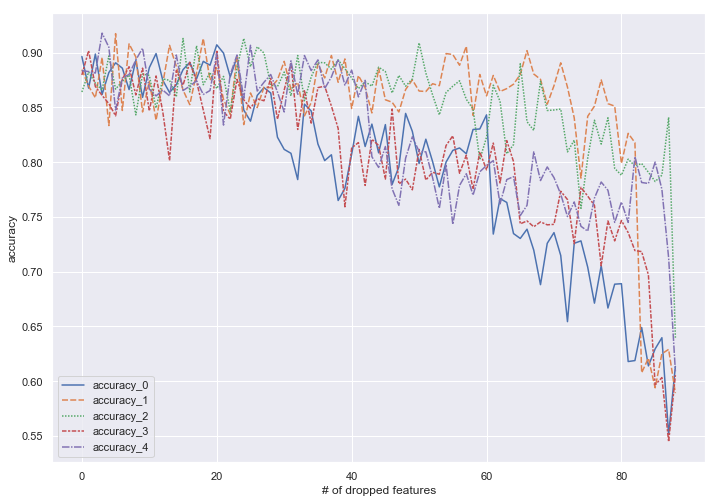

In [9]:
graph = sns.lineplot(data=multiple_graphs)
plt.xlabel('# of dropped features')
plt.ylabel('accuracy')
graph.figure.savefig("dropped_features.png")


In [6]:
def run_once(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    lab_enc = preprocessing.LabelEncoder()
    encoded_y_train = lab_enc.fit_transform(y_train.values.ravel())
    encoded_y_test = lab_enc.fit_transform(y_test.values.ravel())
    
    clf = RandomForestClassifier(n_estimators=100)

    clf.fit(X_train, encoded_y_train)
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    
    feature_list = []
    for feature in zip(X.columns, clf.feature_importances_):
        feature_list.append(feature)
    
    accuracy = accuracy_score(encoded_y_test, y_pred)
    print('Train accuracy: ', accuracy_score(encoded_y_train, y_pred_train))
    print(confusion_matrix(encoded_y_train, y_pred_train))
    print('----------------------------------')
    print('Test accuracy: ', accuracy_score(encoded_y_test, y_pred))
    print(confusion_matrix(encoded_y_test, y_pred))
    return feature_list
    
def run_more_than_once(run_number, X, y):
    tot_acc = 0
    max_matrix = 0
    max_accuracy = 0

    min_matrix = 0
    min_accuracy = 1
    
    tot_acc_train = 0

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    lab_enc = preprocessing.LabelEncoder()
    encoded_y_train = lab_enc.fit_transform(y_train.values.ravel())
    encoded_y_test = lab_enc.fit_transform(y_test.values.ravel())
    
    for i in range(run_number):
        clf = RandomForestClassifier(n_estimators=100)

        clf.fit(X_train, encoded_y_train)
        y_pred = clf.predict(X_test)

        accuracy_train = accuracy_score(encoded_y_train, clf.predict(X_train))
        accuracy = accuracy_score(encoded_y_test, y_pred)

        if accuracy > max_accuracy:
            max_accuracy = accuracy
            max_matrix = confusion_matrix(encoded_y_test, y_pred)

        if accuracy < min_accuracy:
            min_accuracy = accuracy
            min_matrix = confusion_matrix(encoded_y_test, y_pred)

        tot_acc += accuracy
        tot = i+1
        mean = tot_acc/tot
        
        tot_acc_train += accuracy_train
        total = i+1
        mean_train = tot_acc_train/total

    #print('Maximum')
    #print(max_accuracy, '\n', max_matrix)
    #print('----------------------------------')
    #print('Minimum')
    #print(min_accuracy, '\n', min_matrix)
    #print('----------------------------------')
    #print('Mean train accuracy:', mean_train)
    #print('Mean test accuracy:', mean)
    return mean

In [37]:
work = run_more_than_once(10, normalized_df, y)

Maximum
0.8666666666666667 
 [[ 52  17   0]
 [  6 133   0]
 [  6   1  10]]
----------------------------------
Minimum
0.8533333333333334 
 [[ 52  17   0]
 [  9 130   0]
 [  6   1  10]]
----------------------------------
Mean train accuracy: 1.0
Mean test accuracy: 0.8591111111111112


In [7]:
features_importance = run_once(X, y)

Train accuracy:  1.0
[[134   0   0]
 [  0 281   0]
 [  0   0  40]]
----------------------------------
Test accuracy:  0.8533333333333334
[[ 58  21   0]
 [  2 125   1]
 [  3   6   9]]


In [8]:
features_importance = pd.DataFrame(features_importance)

In [10]:
features_importance

,0,1
0,Født,0.031583
1,Oppdaget_når,0.019459
2,Age,0.034891
3,Død,0.009730
4,FIGO_stadium,0.072533
5,Substadium,0.052127
6,histologi,0.093489
7,gradering,0.008255
8,OVAgrade,0.001027
9,myometireinvasjon,0.019126


In [61]:
top_features = features_importance.sort_values(by=[1], ascending=False)

In [62]:
top_10 = top_features[:5]

In [63]:
top_10

,0,1
6,histologi,0.128041
5,Substadium,0.073913
16,Primærbehandling,0.051204
4,FIGO_stadium,0.049583
11,Karinvasjon,0.035933


Text(0, 0.5, 'Importance in %')

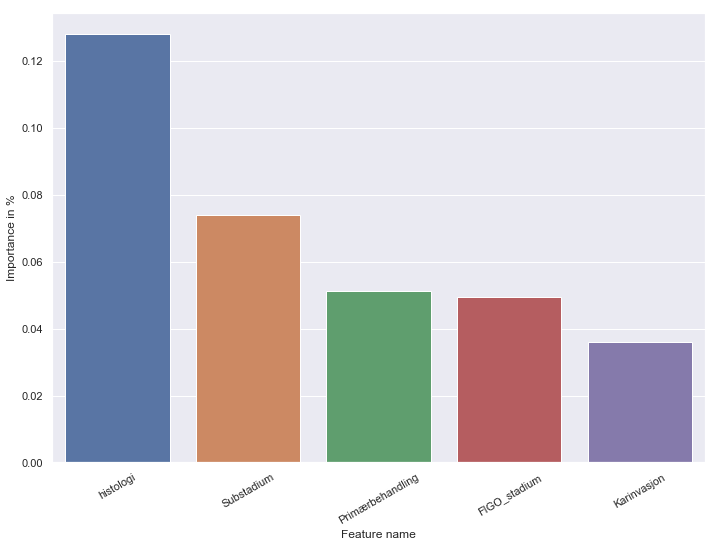

In [64]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="darkgrid")
ax = sns.barplot(x=0 , y=1, data=top_10.reset_index())
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.xlabel('Feature name')
plt.ylabel('Importance in %')
#ax.figure.savefig("task2.png")


In [ ]:
histologi, substadium, primærbehandling, figo_stadium, født